В этой практической работе три обязательные задачи и одна дополнительная.

*Обязательные задачи* нужно сделать для того, чтобы проверить, что вы действительно усвоили материал модуля. Сдайте их на проверку.

*Дополнительная задача* для тех, кто чувствует, что нужно ещё немного потренироваться в подборе правильных критериев для проверки гипотез. Вы также можете сдать её на проверку и получить обратную связь.

Удачи!

## Цели практической работы

Проверить:
*   постановку нулевых и альтернативных гипотез,
*   выбор статистического критерия для проверки гипотез,
*   умение пользоваться Т-критериями,
*   умение пользоваться непараметрическими критериями.

Потренироваться в постановке односторонних и двусторонних тестов.

## Что оценивается

*   Все условия для применения критерия проверены.
*   Применение того или иного критерия обосновано текстом.
*   В каждой задаче присутствует текстовое объяснение почему нулевая гипотеза не может быть отвергнута.




## Как отправить работу на проверку
Сдайте практическую работу этого модуля через систему контроля версий Git сервиса Skillbox GitLab. После загрузки работы на проверку напишите об этом в личном кабинете своему куратору.


##Обязательные задачи

*Задача 1*

Студентов с одним и тем же начальным уровнем английского языка поделили на две группы. Одну группу учили по методике X, а другую по методике Y. После прохождения обучения им дали одинаковые финальные тесты на знание языка. За тест можно получить от 0 до 100 баллов. Проверьте, являются ли статистически значимыми различия в оценках между группой, которая училась по методике X, и группой, которая училась по методике Y.
______________
Опишите словами нулевую и альтернативную гипотезы. Проверьте гипотезы с помощью статистического критерия. Интерпретируйте получившиеся результаты. Уровень значимости = 5%.

Нулевая гипотеза: Средние баллы по тесту у студентов, обучавшихся по методике X и методике Y, не различаются.

Альтернативная гипотеза: Средние баллы по финальному тесту у студентов, обучавшихся по методике X и Y, статистически различаются.

In [ ]:
# строка для тех, кто работает в colab
!pip install scipy==1.7.1

     |████████████████████████████████| 28.5 MB 29.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
from scipy import stats

df = pd.read_csv('C:/Users/User/Desktop/Python/Python/ds-intro/ds-intro/21_modeling/homework/data/hw1.csv', sep = ',')
df.head()

,X,Y
0,57,64
1,67,67
2,58,62
3,55,59
4,54,65


In [7]:
stats.shapiro(df.X)

ShapiroResult(statistic=np.float64(0.984373122264943), pvalue=np.float64(0.28594616875713735))

In [8]:
stats.shapiro(df.Y)

ShapiroResult(statistic=np.float64(0.9864255697754216), pvalue=np.float64(0.4001688833356286))

вывод: p - value X = 0.286 > 0.05 → распределение нормальное
p-value для Y = 0.400 → > 0.05 → распределение нормальное
Подходит для параметрических тестов , выборка независимая значит выполняем проверку на равенство дисперсии с помощью теста Левена 

In [9]:
stats.levene(df.X, df.Y)

LeveneResult(statistic=np.float64(21.696306698497402), pvalue=np.float64(5.850812069599042e-06))

дисперсии не равны p-value = 0.00000585 < 0.05 
Далее применим тест Т-критерии Уэлча с equal_var=False

In [10]:
t_stat, p_value = stats.ttest_ind(df.X, df.Y, equal_var=False, alternative='two-sided')

print(f"t-статистика: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")

t-статистика: -0.629
p-value: 0.530


p-value > 0.05, нулевая гипотеза не отвергается.
Вывод: статистически значимых различий между методиками X и Y нет. Различия в средних баллах (если они есть) могут быть случайными.

*Задача 2*

Ученые придумали добавку для уменьшения веса за две недели. Для проведения эксперимента и проверки добавки набрали тестовую группу из 60 человек. Было произведено два замера веса: один до приема добавок, другой после двухнедельного курса. Изучите данные и сделайте вывод, значимо или незначимо уменьшился вес у тестовой группы.

______________
Опишите словами нулевую и альтернативную гипотезы. Проверьте гипотезы с помощью статистического критерия. Интерпретируйте получившиеся результаты. Уровень значимости = 5%.

Нулевая гипотеза: Средний вес участников до и после приёма добавки не изменился 

Альтернативная гипотеза: Средний вес участников после приёма добавки статистически значимо уменьшился

In [11]:
df2 = pd.read_csv('C:/Users/User/Desktop/Python/Python/ds-intro/ds-intro/21_modeling/homework/data/hw2.csv', sep = ',')
df2.head()

,before,after
0,66,68
1,68,68
2,59,60
3,64,62
4,75,71


(array([ 3.,  5., 10., 11.,  3., 12.,  7.,  4.,  4.,  1.]),
 array([58. , 60.8, 63.6, 66.4, 69.2, 72. , 74.8, 77.6, 80.4, 83.2, 86. ]),
 <BarContainer object of 10 artists>)

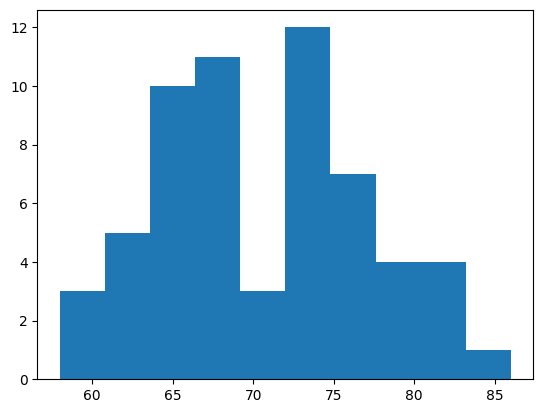

In [12]:
from matplotlib import pyplot
pyplot.hist(df2.before)

(array([ 1.,  3.,  5.,  8.,  7., 13.,  9.,  5.,  7.,  2.]),
 array([56. , 58.6, 61.2, 63.8, 66.4, 69. , 71.6, 74.2, 76.8, 79.4, 82. ]),
 <BarContainer object of 10 artists>)

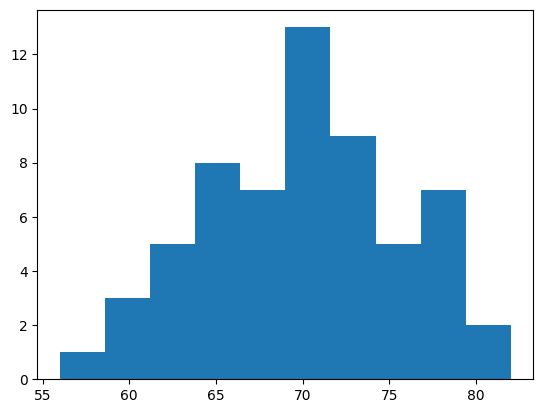

In [13]:
pyplot.hist(df2.after)

In [15]:
stats.shapiro(df2.before)

ShapiroResult(statistic=np.float64(0.9824518487079326), pvalue=np.float64(0.5405409056995981))

In [16]:
stats.shapiro(df2.after)

ShapiroResult(statistic=np.float64(0.9882315263096293), pvalue=np.float64(0.832215596623306))

Обе выборки по отдельности имеют нормальное распределение. Выборки зависимы (одни и те же люди)

In [17]:
stats.ttest_rel(df2.before, df2.after, alternative='greater')

TtestResult(statistic=np.float64(2.055925757507072), pvalue=np.float64(0.02211135004801021), df=np.int64(59))

0.0221 < 0.05   отвергаем нулевую гипотезу. Добавка, вероятно, работает.
Участники в среднем похудели за две недели, и эта разница не случайна — она статистически значима

*Задача 3*

Вы работаете аналитиком в приложении, которое собирает новости по интересам пользователя. Например, если пользователь увлечен книгами,  то приложение будет собирать ему самые свежие новости по новым книгам. Вы заметили, что пользователи редко посещают ваше приложение, а вам хотелось бы поднять их активность и видеть, что они заходят в приложение каждый день или еще чаще. То есть поднять их заинтересованность. 

Вы и группа разработки решили присылать уведомления раз в день с самой популярной новостью по тематикам пользователя. Теперь вам нужно проверить, что эта гипотеза сработала, и заинтересованность пользователя выросла.
______________________
В датасете для каждого пользователя указано, сколько раз в неделю он заходил до появления уведомлений (колонка `before`) и сколько раз в неделю он стал заходить в приложение после появления уведомлений (колонка `after`)
______________
Опишите словами нулевую и альтернативную гипотезы. Проверьте гипотезы с помощью статистического критерия. Интерпретируйте получившиеся результаты. Уровень значимости = 5%.

Нулевая гипотеза: Среднее количество посещений в неделю до и после отправки уведомлений не изменилось

Альтернативная гипотеза: Среднее количество посещений в неделю после отправки уведомлений статистически значимо увеличилось

In [18]:
df3 = pd.read_csv('C:/Users/User/Desktop/Python/Python/ds-intro/ds-intro/21_modeling/homework/data/hw3.csv', sep = ',')
df3.head()

,id,before,after
0,15,3,11
1,7,6,13
2,6,3,8
3,13,1,14
4,11,3,4


In [19]:
stats.shapiro(df3.before)

ShapiroResult(statistic=np.float64(0.9109629581133942), pvalue=np.float64(0.001128772778236105))

In [20]:
stats.shapiro(df3.after)

ShapiroResult(statistic=np.float64(0.9323505343418181), pvalue=np.float64(0.006789438723830561))

Обе выборки по отдельности — не имеют нормального распределения. Значит это непараметрические данные. Выборка зависимая. Используем тест Вилкоксана

In [24]:
stats.wilcoxon(df3['before'], df3['after'], alternative='less')

WilcoxonResult(statistic=np.float64(161.5), pvalue=np.float64(1.6672412784258823e-05))

Принимаем альтернативную гипотезу (H₁)

## Дополнительная задача

*Задача 4*

Компания X тестирует продажу своего продукта через два разных сайта. На оба сайта приходит одинаковое количество пользователей. Причем выборки пользователей не пересекаются, то есть если пользователь увидел сайт 1, он уже не посетит сайт 2. Проверьте гипотезу, что средний чек по пользователям на сайте 1 отличается от среднего чека пользователей на сайте 2 (период сравнения — один месяц).

Опишите словами нулевую и альтернативную гипотезы. Проверьте гипотезы с помощью статистического критерия. Интерпретируйте получившиеся результаты. Уровень значимости = 5%.

Нулевая гипотеза:________________________

Альтернативная гипотеза: ____________________________

In [ ]:
df4 = pd.read_csv('hw4.csv')
df4.head()

In [ ]:
# Ваш код здесь